In [248]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
#1. Load and Display Data → Read the dataset and print the first 5 rows.

data = pd.read_csv("covid_19_country_wise_latest.csv")
print(data.head())

   Unnamed: 0 Country/Region  Confirmed Deaths  Recovered  Active  New cases  \
0           0    Afghanistan      36263   1269      25198    9796      106.0   
1           1        Albania       4880    144       2745    1991      117.0   
2           2        Algeria      27973   1163      18837    7973      616.0   
3           3        Andorra        907     52        803      52       10.0   
4           4         Angola        950     41        242     667       18.0   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0        10.0             18                3.50                  69.49   
1         6.0             63                2.95                  56.25   
2         8.0            749                4.16                  67.34   
3         0.0              0                5.73                  88.53   
4         1.0              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0  

In [252]:
# 2. Set the Dataset index is Unnamed: 0
# 3. Now replace the index column Unnamed: 0 name with index

data.set_index("Unnamed: 0", inplace=True)
data.index.name = 'index'

In [254]:


# Create Function that take dataset columns and replace whitespace
# with Underscore and update dataset automatically and the pass the
# dataset.


def clean_column_names(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df

data = clean_column_names(data)

In [256]:
# Check Basic Information → Find column names, data types, and
# missing values.
data.info()
print("""------------
        |Missing values| """)
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    object 
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New_cases               177 non-null    float64
 6   New_deaths              177 non-null    float64
 7   New_recovered           187 non-null    int64  
 8   Deaths_/_100_Cases      187 non-null    float64
 9   Recovered_/_100_Cases   187 non-null    float64
 10  Deaths_/_100_Recovered  187 non-null    float64
 11  Confirmed_last_week     187 non-null    int64  
 12  1_week_change           187 non-null    int64  
 13  1_week_%_increase       187 non-null    float64
 14  WHO_Region              187 non-null    object 

Country/Region             0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
New_cases                 10
New_deaths                10
New_recovered              0
Deaths_/_100_Cases         0
Recovered_/_100_Cases      0
Deaths_/_100_Recovered     0
Confirmed_last_week        0
1_week_change              0
1_week_%_increase          0
WHO_Region                 0
dtype: int64

In [258]:
# here We are checking in 
data[data.New_cases.isna()]


,Country/Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,WHO_Region
index,,,,,,,,,,,,,,,
11,Bahamas,382,11,91,280,NaN,NaN,0,2.88,23.82,12.09,174,208,119.54,Americas
19,Bhutan,99,0,86,13,NaN,NaN,1,0.00,86.87,0.00,90,9,10.00,South-East Asia
48,Djibouti,5059,58,4977,24,NaN,NaN,11,1.15,98.38,1.17,5020,39,0.78,Eastern Mediterranean
73,Guyana,389,20,181,188,NaN,NaN,0,5.14,46.53,11.05,337,52,15.43,Americas
95,Latvia,1219,31,1045,143,NaN,NaN,0,2.54,85.73,2.97,1192,27,2.27,Europe
112,Moldova,23154,748,16154,6252,NaN,NaN,245,3.23,69.77,4.63,21115,2039,9.66,Europe
121,New Zealand,1557,22,1514,21,NaN,NaN,1,1.41,97.24,1.45,1555,2,0.13,Western Pacific
172,Turkey,227019,5630,210469,10920,NaN,NaN,982,2.48,92.71,2.67,220572,6447,2.92,Europe
180,Venezuela,15988,146,9959,5883,NaN,NaN,213,0.91,62.29,1.47,12334,3654,29.63,Americas


In [259]:
# 6. fill the nan values with the mean of the column
# A) Now we are filling missing data with the mean of the colume 
data.fillna(data.New_cases.mean(), inplace=True)

In [260]:
# 7. Count the number of unique countries in the dataset.

print("Unique Country/Region:",data["Country/Region"].nunique())

Unique Country/Region: 187


In [261]:
#8 Check if there are any duplicate country entries and remove them if needed.
data = data.drop_duplicates(subset=["Country/Region"])

In [264]:
# 9. Find the mean, median, and standard deviation of total cases.
data.describe()

,Confirmed,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase
count,1.870000e+02,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,5.063148e+04,3.400194e+04,1282.740113,97.371129,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,1.901882e+05,2.133262e+05,5704.395582,306.888989,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,6.265000e+02,1.415000e+02,5.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,2.815000e+03,1.600000e+03,71.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,2.260600e+04,9.149000e+03,586.500000,7.500000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,1.846641e+06,2.816444e+06,56336.000000,1282.740113,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [268]:
# Q)# Find out the string in Deaths Column and replace it with the
# mean of Deaths column.

# step1
# Here we are working on deaths colume because this colume have int values but data type shows object , now we are finding index number and further steps 
# your seeing right now 

data.Deaths.unique()

data[data.Deaths == "non"]



,Country/Region,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,WHO_Region
index,,,,,,,,,,,,,,,
186,Zimbabwe,2704,non,542,2126,192.0,2.0,24,1.33,20.04,6.64,1713,991,57.85,Africa


In [269]:
# step2
# Here we are changing colume value by mode cuz its type right now is object so here mode will help us  
data.iloc[186:187,2:3] = data.Deaths.mode() 

# now here we have changed colume data type 
data.Deaths = data.Deaths.astype(float)
data.info()
# Find out the string in Deaths Column and replace it with the
# mean of Deaths column.
data.iloc[186:187,2:3] = data.Deaths.mean()


<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    float64
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New_cases               187 non-null    float64
 6   New_deaths              187 non-null    float64
 7   New_recovered           187 non-null    int64  
 8   Deaths_/_100_Cases      187 non-null    float64
 9   Recovered_/_100_Cases   187 non-null    float64
 10  Deaths_/_100_Recovered  187 non-null    float64
 11  Confirmed_last_week     187 non-null    int64  
 12  1_week_change           187 non-null    int64  
 13  1_week_%_increase       187 non-null    float64
 14  WHO_Region              187 non-null    object 

In [270]:
# data has been changed
data.iloc[186:187,2:3] 

,Deaths
index,
186,3497.326203


In [271]:
# 12. Calculate total number of Death and Recovery all over the world


Total_deaths = data.Deaths.sum()
Total_Recovered = data.Recovered.sum()
print(f"The total number of deaths all over the world is: {Total_deaths} and, The total number of Recovery all over the world is: {Total_Recovered} ")

The total number of deaths all over the world is: 657497.3262032085 and, The total number of Recovery all over the world is: 9468087 


In [272]:
# 13. How many countries have more than 1 million total cases

data["Total_cases"] = data["Confirmed"] + data["Deaths"] + data["Recovered"]

# data["Country/Region"]
print(f"The countries that have cases more then 1 million are: {len(data[data.Total_cases > 1000000])} countries!")


The countries that have cases more then 1 million are: 4 countries!


In [273]:
# 14. Which countries have a recovery rate (Recovered / Total Cases)above 95%

recovery = data[(data["Recovered"]/data["Total_cases"])*100 > 95]["Country/Region"]
print(recovery)


# A) there is no country that have recovery rate of 95

Series([], Name: Country/Region, dtype: object)


In [274]:
# 15. Drop columns name WHO Region and Confirmed

data.drop(columns=['WHO_Region', 'Confirmed'], inplace=True)



In [275]:
# 16. Find the Country with the Max Deaths


max_deaths_country=data.loc[data["Deaths"].idxmax(), "Country/Region"]
print("The country with the max Deaths rate is :",max_deaths_country)


The country with the max Deaths rate is : US


In [284]:
# 17. Sort Countries by Deaths (Descending Order)

sort_data=data.sort_values(by="Deaths",ascending=False)

print(sort_data)


         Country/Region    Deaths  Recovered   Active     New_cases  \
index                                                                 
173                  US  148011.0    1325804  2816444  56336.000000   
23               Brazil   87618.0    1846641   508116  23284.000000   
177      United Kingdom   45844.0       1437   254427    688.000000   
111              Mexico   44022.0     303810    47657   4973.000000   
85                Italy   35112.0     198593    12581    168.000000   
...                 ...       ...        ...      ...           ...   
19               Bhutan       0.0         86       13   1282.740113   
130    Papua New Guinea       0.0         11       51      0.000000   
75             Holy See       0.0         12        0      0.000000   
30             Cambodia       0.0        147       79      1.000000   
114            Mongolia       0.0        222       67      1.000000   

        New_deaths  New_recovered  Deaths_/_100_Cases  Recovered_/_100_Cases

In [287]:
# 18. Make new column name Total_cases that have a sum of Deaths,Recovered , Active
# A) here we are making another total cases column that contain the sum of deaths,recovered,and active 

data["Total_Cases"] = data.Deaths + data.Recovered + data.Active 

data.drop(columns={"Total_cases"},inplace=True)
# Now i have to drop my first "total cases" to clean data<3


In [289]:
# 19. Calculate Death_Rate for Each Country (Deaths per Total Cases) by suing formula (Desths/Total_cases)*100 and save it in Dath_Rate column

data['Death_Rate'] = (data['Deaths'] / data["Total_Cases"]) * 100


In [291]:
# 20. Identify countries where total cases are increasing but death rates remain low

data[(data["Total_Cases"] > data["Total_Cases"].shift(1)) & (data["Death_Rate"] < 2)]["Country/Region"]


index
6                             Argentina
10                           Azerbaijan
12                              Bahrain
13                           Bangladesh
15                              Belarus
18                                Benin
28                              Burundi
29                           Cabo Verde
39                  Congo (Brazzaville)
41                           Costa Rica
50                   Dominican Republic
57                             Eswatini
58                             Ethiopia
64                              Georgia
69                              Grenada
84                               Israel
89                           Kazakhstan
92                               Kuwait
96                              Lebanon
102                          Luxembourg
103                          Madagascar
105                            Malaysia
114                            Mongolia
115                          Montenegro
116                             Mo

In [317]:
# 21. print head of only 2 columns Country/Region and Death_Rate

print(data[["Country/Region","Death_Rate"]].head())

      Country/Region  Death_Rate
index                           
0        Afghanistan    3.499435
1            Albania    2.950820
2            Algeria    4.157581
3            Andorra    5.733186
4             Angola    4.315789


In [325]:
data.head()

,Country/Region,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,Total_Cases,Death_Rate
index,,,,,,,,,,,,,,,
0,Afghanistan,1269.0,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,36263.0,3.499435
1,Albania,144.0,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,4880.0,2.950820
2,Algeria,1163.0,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,27973.0,4.157581
3,Andorra,52.0,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,907.0,5.733186
4,Angola,41.0,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,950.0,4.315789


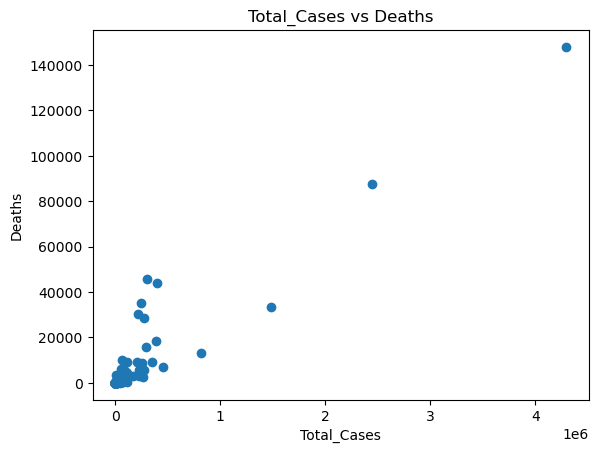

In [353]:
# 22. Create a scatter plot comparing total cases and total deaths.

plt.scatter(data["Total_Cases"],data["Deaths"])

# adding titles

plt.xlabel("Total_Cases")
plt.ylabel("Deaths")
plt.title("Total_Cases vs Deaths")

plt.show()


In [361]:
# 23. Save dataset in CSV format.

data.to_csv("clean_data_covid_19_report", index=False)

,Country/Region,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,Deaths_/_100_Cases,Recovered_/_100_Cases,Deaths_/_100_Recovered,Confirmed_last_week,1_week_change,1_week_%_increase,Total_Cases,Death_Rate
index,,,,,,,,,,,,,,,
0,Afghanistan,1269.000000,25198,9796,106.0,10.0,18,3.50,69.49,5.04,35526,737,2.07,36263.000000,3.499435
1,Albania,144.000000,2745,1991,117.0,6.0,63,2.95,56.25,5.25,4171,709,17.00,4880.000000,2.950820
2,Algeria,1163.000000,18837,7973,616.0,8.0,749,4.16,67.34,6.17,23691,4282,18.07,27973.000000,4.157581
3,Andorra,52.000000,803,52,10.0,0.0,0,5.73,88.53,6.48,884,23,2.60,907.000000,5.733186
4,Angola,41.000000,242,667,18.0,1.0,0,4.32,25.47,16.94,749,201,26.84,950.000000,4.315789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,78.000000,3752,6791,152.0,2.0,0,0.73,35.33,2.08,8916,1705,19.12,10621.000000,0.734394
183,Western Sahara,1.000000,8,1,0.0,0.0,0,10.00,80.00,12.50,10,0,0.00,10.000000,10.000000
184,Yemen,483.000000,833,375,10.0,4.0,36,28.56,49.26,57.98,1619,72,4.45,1691.000000,28.562980
